# Introduction

## Introduction to domain specific area (SMS Spam Detection)
[Word Count: 477]

### The Growing Challenge of SMS Spam in Digital Communication

Short Message Service (SMS) has become one of the most prevalent forms of digital communication worldwide, with over 3.5 billion phone users receiving text messages daily (Keepnet Labs, 2024). However, this widespread adoption has created significant security vulnerabilities. Spam SMSes are unsolicited messages to users, which can be harmful as SMS attacks can lead to theft of private data and spreading malware to other users (Kaspersky, 2020). A key factor contributing to SMS vulnerability is that unlike other messaging platforms such as Facebook and WhatsApp, SMS does not require an active internet connection, making it universally accessible and therefore particularly attractive to spammers (Bocereg et al., 2024).

The economic incentive for spammers is substantial. Scammers using SMS scams stole an estimated $13 billion between January and June 2023 in the United States alone, while Americans received 77.5 billion automated spam texts throughout the same period (Ellis & Brandl, 2024). These attacks encompass unsolicited commercial messages, premium rate telephone service scams, and phishing messages seeking personal or financial data (Cloudmark, 2020).

### Technical Challenges

SMS spam detection presents unique technical challenges that distinguish it from other forms of spam filtering. SMS spam detection techniques are more challenging than email spam detection techniques because of regional contents and use of abbreviated words (Hidalgo et al., 2006). Additionally, existing email filtering algorithms may underperform due to factors such as lack of real databases for SMS spam, limited features, and informal language patterns (Roy et al., 2019).
The constrained nature of SMS communication creates additional complexity, as SMS are usually shorter than email messages. Only 160 characters are allowed in standard SMS text, and that could be a problem because using fewer words means less information to work with (Amazon Web Services, 2023).


### The Role of Machine Learning

The complexity of SMS spam has necessitated automated detection systems. Traditional machine learning techniques, such as Naive Bayes and support vector machines (SVM), offer improved accuracy but depend on handcrafted features. In contrast, deep learning models, including recurrent neural networks (RNN) and convolutional neural networks (CNN), excel in feature extraction and adaptability yet face challenges with model complexity and the need for large labelled datasets (Abdulhamid et al., 2017).

Recent comparative studies have shown promising results for deep learning approaches, with LSTM models outperforming previous models in spam detection with 98.5% accuracy compared to traditional machine learning methods achieving 95-97% accuracy (Gadde et al., 2021).

### Research Contribution

While these advances demonstrate the potential of automated detection systems, the comparative effectiveness of traditional statistical methods versus modern deep learning approaches for SMS spam detection requires further systematic investigation. This research addresses this critical need by implementing and comparing Naive Bayes, Logistic Regression, and Embedding-based Neural Networks on a standardized dataset, providing practical insights for telecommunications providers as mobile phishing increases and SMS-based attacks become increasingly sophisticated.

## Objectives
[Word Count: 289]

### Primary Aim

The primary objective of this project is to compare the effectiveness of a statistical model (Logistic Regression) and a modern embedding-based neural network for SMS spam detection. A Naive Bayes classifier will serve as the baseline model to establish performance benchmarks against which both the statistical and embedding-based approaches will be evaluated.

This project will compare Logistic Regression using TF-IDF vectorization against an embedding-based neural network utilizing word embeddings and sequential processing. The comparative analysis will examine accuracy, precision, recall, and F1-score metrics to assess each model's spam detection capabilities relative to the established baseline.

### Technical Objectives

The project aims to evaluate the effectiveness of different text representation techniques in capturing spam-indicative patterns within SMS messages. The statistical approach will employ TF-IDF vectorization to transform textual content into numerical features, while the embedding-based model will utilize dense vector representations to capture semantic relationships between words. This comparison will reveal which feature extraction methodology proves most effective for the distinctive characteristics of SMS communication, including informal language, abbreviations, and concise messages.

Cross-validation methodology will be employed to assess model stability and generalization capabilities, providing insights into the reliability of each approach across different data distributions. The analysis will also examine interpretability factors that influence practical deployment decisions in telecommunications infrastructure.

### Research Questions

This project addresses two core questions: First, how do statistical and embedding-based models compare in SMS spam detection performance when evaluated against a consistent baseline? Second, do traditional statistical methods with proper preprocessing remain competitive with modern deep learning approaches for SMS spam detection tasks?

These objectives aim to provide evidence for optimal model selection in SMS spam filtering applications while establishing a framework for comparing traditional and modern machine learning approaches in text classification tasks.

## Dataset Description 
[Word Count: 368]

The dataset was obtained from Kaggle (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data), and stored in a CSV file format, which is widely used for storing tabular data. It is a public set of SMS labelled messages that were collected for spam research, as part of the UCI Machine Learning Repository (Almeida, T. & Hidalgo, J., 2011), and is also available at https://archive.ics.uci.edu/dataset/228/sms+spam+collection. The CSV file contains one message per row, and each row composes of 2 columns: v1 contains the label, and v2 contains the text message. 

There are a total of 5,574 messages, tagged as either spam or non-spam (ham). The data was curated from four different sources to create a comprehensive spam detection corpus. 

-	425 SMS spam messages manually extracted from the Grumbletext website, a UK forum where mobile users report spam messages. 
-	3,375 ham messages randomly selected from the NUS SMS Corpus collected at the National University of Singapore, primarily from university students
-	450 ham messages from Caroline Tagg's PhD thesis on the linguistics study of SMS text messaging patterns (Tagg , 2009).
-	1,324 additional messages, 1,002 ham and 322 spam messages from the SMS Spam Corpus v.0.1 Big dataset.

### Loading and Exploring the Dataset

In [1]:
import pandas as pd
# Loading the dataset
df = pd.read_csv('data/spam.csv', encoding='latin-1')

# Extract the first 2 columns which contains data
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Check for any missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Remove duplicates if present
original_size = len(df)
df = df.drop_duplicates().reset_index(drop=True)
print(f"\nRemoved {original_size - len(df)} duplicate messages")
print(f"Final dataset size: {len(df)}")

# Basic dataset info after duplicate removal
print(f"\nColumn names: {list(df.columns)}")
print(df['label'].value_counts())
print(f"Spam percentage: {(df['label'] == 'spam').mean():.2%}")


Missing values:
label      0
message    0
dtype: int64

Removed 403 duplicate messages
Final dataset size: 5169

Column names: ['label', 'message']
label
ham     4516
spam     653
Name: count, dtype: int64
Spam percentage: 12.63%


The final dataset contains 5,169 SMS messages after removing 403 duplicates, with no missing values. The distribution shows 4,516 legitimate messages (87.37%) and 653 spam messages (12.63%), providing a realistic representation of typical SMS traffic where spam constitutes a minority portion.

In [2]:
# Analysing message characteristics

print("MESSAGE CHARACTERISTICS")
print("-"*60)

# Calculate message statistics
df['message_length'] = df['message'].str.len()
df['word_count'] = df['message'].str.split().str.len()

# Statistics by class
stats = df.groupby('label')[['message_length', 'word_count']].agg(['mean', 'median', 'std']).round(2)
print("\nMESSAGE LENGTH & WORD COUNT STATISTICS:")
print(stats)

# Show range
print(f"\nMESSAGE LENGTH RANGES:")
for label in ['ham', 'spam']:
    subset = df[df['label'] == label]
    min_len = subset['message_length'].min()
    max_len = subset['message_length'].max()
    print(f"- {label.upper()}: {min_len} to {max_len} characters")

print(f"\nWORD COUNT RANGES:")
for label in ['ham', 'spam']:
    subset = df[df['label'] == label]
    min_words = subset['word_count'].min()
    max_words = subset['word_count'].max()
    print(f"- {label.upper()}: {min_words} to {max_words} words")

MESSAGE CHARACTERISTICS
------------------------------------------------------------

MESSAGE LENGTH & WORD COUNT STATISTICS:
      message_length               word_count              
                mean median    std       mean median    std
label                                                      
ham            70.46   52.0  56.36      14.13   11.0  11.12
spam          137.89  149.0  30.14      23.68   25.0   5.97

MESSAGE LENGTH RANGES:
- HAM: 2 to 910 characters
- SPAM: 13 to 224 characters

WORD COUNT RANGES:
- HAM: 1 to 171 words
- SPAM: 2 to 35 words


Each message is stored as plain text with a corresponding binary label ('ham' for legitimate messages, 'spam' for spam messages). 

The spam messages are significantly longer on average (138 characters vs 70 characters) and more consistent in length (standard deviation of 30 vs 56), which suggests that perhaps they were constructed in a more formulaic fashion. Legitimate messages show greater variability, ranging from brief 2-character responses to lengthy 910-character responses. Word count analysis shows spam messages average 24 words compared to 14 words for legitimate messages, with spam messages being more standardized in structure.

The dataset represents real-world SMS communication patterns across different English-speaking populations (UK, Singapore), making it suitable for developing generalizable spam detection models. The class imbalance (12.63% spam) reflects realistic SMS traffic patterns, and the distinct message length patterns provide clear distinguishing features for classification algorithms.

## Evaluation Methodology
[Word Count: 394]

For SMS spam detection, I will need metrics that can measure binary classification performance across all 3 models: Naive Bayes, Logistic Regression and Embedding-based Neural Network.

*TP stands for true positives, TN stands for true negatives, FP stands for false positives, FN stands for false negatives.*

- **Accuracy**: (TP + TN) / (TP + TN + FP + FN) will be used to measure the general model performance, i.e. the overall correctness of predictions.
- **Precision**: TP / (TP + FP) measures the proportion of predicted spam that is actually spam, and a higher score indicates minimal false positives which is important to prevent legitimate messages from being filtered incorrectly.
- **Recall**: TP / (TP + FN) measures the proportion of actual spam that is correctly classified, and a higher recall ensures spam messages are blocked from reaching users. 
- **F1-Score**: 2 × (Precision × Recall) / (Precision + Recall) is the harmonic mean of precision and recall, and acts a balanced measure of performance, which is especially important as the dataset is imbalanced (12.63% spam)
- A **confusion matrix** will also be generated for each model to provide a detailed breakdown of prediction outcomes, useful for visualizing specific model weaknesses.

During model development and training, 5-fold stratified cross-validation was used on the training set for statistical models (Naive Bayes and Logistic Regression) to obtain robust performance estimates and prevent overfitting. This approach is especially important given the dataset imbalance (12.63% spam), as stratified sampling maintains the class distribution across all folds and provides stable performance assessment. 

The embedding-based neural network employed a train-validation split approach during training, using 20% of the training data for validation to monitor model performance and prevent overfitting. This validation methodology differs from the cross-validation used for statistical models, as neural networks require consistent validation sets for callbacks such as early stopping and learning rate scheduling. All models were evaluated on the same held-out test set for fair comparison.

For class analysis, precision and recall will be calculated for both spam and ham classes. As the primary purpose of this assignment is to build a spam detection model, precision will be prioritized overall recall to avoid blocking legitimate messages, although recall is still critical for security purposes (preventing malicious messages from reaching users). The F1-score will provide an optimal balance, while the confusion matrix will reveal whether models have systematic biases toward false positives or false negatives.

# Implementation

In [3]:
# Look at 20 random messages (10 ham, 10 spam)
print("RANDOM SAMPLE OF MESSAGES")
print("-"*60)

# Get 10 random ham messages
print("\n10 RANDOM HAM MESSAGES:")
print("-" * 40)
ham_sample = df[df['label'] == 'ham'].sample(10, random_state=40)
for i, message in enumerate(ham_sample['message']):
    print(f"{i+1}: {message}")

print("\n10 RANDOM SPAM MESSAGES:")
print("-" * 40)
spam_sample = df[df['label'] == 'spam'].sample(10, random_state=40)
for i, message in enumerate(spam_sample['message']):
    print(f"{i+1}: {message}")

RANDOM SAMPLE OF MESSAGES
------------------------------------------------------------

10 RANDOM HAM MESSAGES:
----------------------------------------
1: Joy's father is John. Then John is the NAME of Joy's father. Mandan
2: Anything is valuable in only 2 situations: First- Before getting it... Second- After loosing it...
3: Aight, sounds good. When do you want me to come down?
4: I had a good time too. Its nice to do something a bit different with my weekends for a change. See ya soon
5: Omg you can make a wedding chapel in frontierville? Why do they get all the good stuff?
6: How are you babes. Hope your doing ok. I had a shit nights sleep. I fell asleep at 5.IåÕm knackered and iåÕm dreading work tonight. What are thou upto tonight. X
7: It's justbeen overa week since we broke up and already our brains are going to mush!
8: Total video converter free download type this in google search:)
9: Yar lor he wan 2 go c horse racing today mah, so eat earlier lor. I ate chicken rice. U?
10:

## Data Preprocessing

In [4]:
# importing packages
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Cleaning the SMS text messages

In [5]:
def clean_sms_messages(text):
    """
    Clean and normalize SMS messages for spam detection
    Handles encoding issues, tokenizes patterns, and standardizes format
    """
    if pd.isna(text):
        return ""

    # Fix encoding issues first
    text = text.replace('å£', '£')
    text = text.replace('åÕ', "'")
    text = text.replace('åÁ', ' ')

    # Convert to lowercase
    text = text.lower()

    # Replace specific patterns with fixed tokens
    # URLs and websites
    text = re.sub(r'http[s]?://\S+|www\.\S+', 'URL_TOKEN', text)

    # Currency amounts (handle commas and decimals and £, $, € currency symbols
    text = re.sub(r'[£$€?]\d+(?:,\d{3})*(?:\.\d{2})?', 'MONEY_TOKEN', text)
    # Replace spelling of common currencies with tokens
    text = re.sub(r'\b\d+\s*(?:pounds?|dollars?|euros?|gbp|usd)\b',
                  'MONEY_TOKEN', text)

    # Phone numbers (handles both hyphens and spaces)
    text = re.sub(r'\b\d{4}-\d{4}-\d{3}\b', 'PHONE_TOKEN', text)  # xxxx-xxxx-xxx
    text = re.sub(r'\b\d{4}-\d{3}-\d{3}\b', 'PHONE_TOKEN', text)  # xxxx-xxx-xxx
    text = re.sub(r'\b\d{3}-\d{3}-\d{4}\b', 'PHONE_TOKEN', text)  # xxx-xxx-xxxx
    text = re.sub(r'\b\d{11}\b', 'PHONE_TOKEN', text)  # 11-digit
    text = re.sub(r'\b\d{10}\b', 'PHONE_TOKEN', text)  # 10-digit
    text = re.sub(r'\b\d{5,6}\b', 'SHORT_CODE', text)  # Short codes like 80082, 87131
    text = re.sub(r'\b\d+x+\d*\b', 'PHONE_TOKEN', text)  # Numbers with X's

    # Dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', 'DATE_TOKEN', text)

    # Replace excessive punctuation with tokens
    text = re.sub(r'\.{3,}', ' DOTS ', text)
    text = re.sub(r'!{2,}', ' EXCLAMATION ', text)

    # Remove backslashes and quotes
    text = re.sub(r'\\', ' ', text)
    text = re.sub(r'"', ' ', text)

    # Remove extra punctuation and extra whitespaces
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [6]:
# Demonstrating text cleaning on random samples
print("CLEANED SMS EXAMPLES:")
print("=" * 50)

# Clean the 10 random ham messages from before
print("\n10 RANDOM HAM MESSAGES:")
print("-" * 40)

for i, message in enumerate(ham_sample['message']):
    print(f"Example {i+1}:")
    print(f"Original: {message}")
    message = clean_sms_messages(message)
    print(f"Cleaned: {message}")
    print()

print("\n10 RANDOM SPAM MESSAGES:")
print("-" * 40)

for i, message in enumerate(spam_sample['message']):
    print(f"Example {i+1}:")
    print(f"Original: {message}")
    message = clean_sms_messages(message)
    print(f"Cleaned: {message}")
    print()

CLEANED SMS EXAMPLES:

10 RANDOM HAM MESSAGES:
----------------------------------------
Example 1:
Original: Joy's father is John. Then John is the NAME of Joy's father. Mandan
Cleaned: joy s father is john then john is the name of joy s father mandan

Example 2:
Original: Anything is valuable in only 2 situations: First- Before getting it... Second- After loosing it...
Cleaned: anything is valuable in only 2 situations first before getting it DOTS second after loosing it DOTS

Example 3:
Original: Aight, sounds good. When do you want me to come down?
Cleaned: aight sounds good when do you want me to come down

Example 4:
Original: I had a good time too. Its nice to do something a bit different with my weekends for a change. See ya soon
Cleaned: i had a good time too its nice to do something a bit different with my weekends for a change see ya soon

Example 5:
Original: Omg you can make a wedding chapel in frontierville? Why do they get all the good stuff?
Cleaned: omg you can make a w

In [7]:
# Apply text cleaning to the entire dataset
df['cleaned_message'] = df['message'].apply(clean_sms_messages)

### Preprocessing cleaned SMS text for Statisical Models

Stopword removal is done on the tokenized messages, followed by stemming to reduce words to their base form. Stemming was chosen over lemmatization as informal language is typically used in SMS, such as shortcuts: 'u' instead of 'you', which the lemmatizer will not recognise. Additionally, it is more common for SMS messages to have misspelled words, and stemming is more forgiving of such variations, e.g. 'receive' and 'recieve' are both handled. 

Stemming is only done for the baseline (Naive Bayes) and statistical model (Logistic Regression).

In [8]:
# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Remove stopwords and returns string for vectorizers to process
def remove_stopwords(text):
    
    if pd.isna(text) or text == "":
        return ""

    # Tokenize
    tokens = word_tokenize(text)

    # Remove common English stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join back to string for vectorizers
    return ' '.join(filtered_tokens)

# Apply stemming and returns string for vectorizers to process
def stem_text(text):
    
    if pd.isna(text) or text == "":
        return ""

    # Tokenize
    tokens = word_tokenize(text)
    
    # Apply stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join back to string for vectorizers
    return ' '.join(stemmed_tokens)

In [9]:
# Demonstrating preprocessing on random samples
print("PROCESSED SMS EXAMPLES:")
print("=" * 50)

# Clean the 10 random ham messages from before
print("\n10 RANDOM HAM MESSAGES:")
print("-" * 40)

for i, message in enumerate(ham_sample['message']):
    print(f"Example {i+1}:")
    message = clean_sms_messages(message)
    print(f"Original: {message}")
    message = remove_stopwords(message)
    message = stem_text(message)
    print(f"Processed: {message}")
    print()

print("\n10 RANDOM SPAM MESSAGES:")
print("-" * 40)

for i, message in enumerate(spam_sample['message']):
    print(f"Example {i+1}:")
    message = clean_sms_messages(message)
    print(f"Original: {message}")
    message = remove_stopwords(message)
    message = stem_text(message)
    print(f"Processed: {message}")
    print()

PROCESSED SMS EXAMPLES:

10 RANDOM HAM MESSAGES:
----------------------------------------
Example 1:
Original: joy s father is john then john is the name of joy s father mandan
Processed: joy father john john name joy father mandan

Example 2:
Original: anything is valuable in only 2 situations first before getting it DOTS second after loosing it DOTS
Processed: anyth valuabl 2 situat first get dot second loos dot

Example 3:
Original: aight sounds good when do you want me to come down
Processed: aight sound good want come

Example 4:
Original: i had a good time too its nice to do something a bit different with my weekends for a change see ya soon
Processed: good time nice someth bit differ weekend chang see ya soon

Example 5:
Original: omg you can make a wedding chapel in frontierville why do they get all the good stuff
Processed: omg make wed chapel frontiervil get good stuff

Example 6:
Original: how are you babes hope your doing ok i had a shit nights sleep i fell asleep at 5 i m 

In [10]:
# Preprocess the cleaned messages
df['cleaned_no_stopwords'] = df['cleaned_message'].apply(remove_stopwords)
df['processed_message'] = df['cleaned_no_stopwords'].apply(stem_text)

### Spliting the dataset

In [11]:
from sklearn.model_selection import train_test_split

X = df['processed_message']
y = (df['label'] == 'spam').astype(int)  # Convert to binary (0=ham, 1=spam)

# 80/20 split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

print(f"Training set: {len(X_train)} samples ({y_train.mean():.2%} spam)")
print(f"Test set: {len(X_test)} samples ({y_test.mean():.2%} spam)")

# Verify class distribution is maintained
print("\nClass distribution:")
print(f"Original: {y.mean():.2%} spam")
print(f"Train:    {y_train.mean():.2%} spam")
print(f"Test:     {y_test.mean():.2%} spam")

Training set: 4135 samples (12.62% spam)
Test set: 1034 samples (12.67% spam)

Class distribution:
Original: 12.63% spam
Train:    12.62% spam
Test:     12.67% spam


For the embedding model, the data is split using the same 80/20 train/test ratio as the statistical models to ensure fair comparison, with stratification maintaining the class distribution across splits. However, the embedding model uses the cleaned_message data instead of the processed_message used by statistical models, as embedding layers perform better with more natural text that preserves word forms and relationships rather than heavily preprocessed text with stemming and aggressive normalization.

In [12]:
# Use cleaned_message
X_embedding = df['cleaned_message']
y_embedding = (df['label'] == 'spam').astype(int)

# Same 80/20 split as other models
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(
    X_embedding, y_embedding, test_size=0.2, random_state=40, stratify=y_embedding
)

# Verify class distribution is maintained
print("\nClass distribution:")
print(f"Original: {y.mean():.2%} spam")
print(f"Train:    {y_train_emb.mean():.2%} spam")
print(f"Test:     {y_test_emb.mean():.2%} spam")


Class distribution:
Original: 12.63% spam
Train:    12.62% spam
Test:     12.67% spam


### Text Vectorization for Statistical Models

TfidfVectorizer is used to vectorize the processed SMS messages for the Naive Bayes and Logistic Regression models. This approach converts text into sparse numerical vectors using Term Frequency-Inverse Document Frequency (TF-IDF) weighting, which emphasizes words that are frequent in a document but rare across the entire corpus. The vectorizer includes both unigrams and bigrams (ngram_range=(1,2)) to capture sequential word patterns common in SMS spam, such as "specially selected" or "urgent mobile". The min_df=2 parameter removes words that appear in fewer than 2 documents to reduce noise, while max_df=0.9 filters out overly common words that appear in more than 90% of messages. This creates high-dimensional sparse matrices that serve as input features for traditional statistical models algorithms, enabling them to identify spam patterns through statistical word importance.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer(
    min_df=2,
    max_df=1.0,
    ngram_range=(1, 2),  # Bigrams due to SMS langauge patterns
)

# Fit on training data and transform
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

### Tokenization for Embedding Model

The embedding model requires a different data preparation approach compared to statistical models. It uses Keras tokenization to convert text messages into integer sequences, where each word receives a unique numerical identifier. Sequences are padded to a uniform length of 100 tokens to ensure consistent input dimensions for the neural network. This approach preserves word order and enables the embedding layer to learn dense word representations for each word during training. Thus, the model can capture semantic relationships automatically rather than relying on manually engineered features.

Additionally, the embedding model requires a separate validation split from the training data (20% of training set) to monitor training progress and implement early stopping mechanisms, which is standard practice for neural network training but not necessary for traditional statistical models.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# To ensure uniform sequence lengths
MAX_SEQUENCE_LENGTH = 100

# Initialize Keras Tokenizer
embedding_tokenizer = Tokenizer()

# Fit tokenizer on training data
embedding_tokenizer.fit_on_texts(X_train_emb)

# Convert texts to sequences of integers
X_train_emb_seq = embedding_tokenizer.texts_to_sequences(X_train_emb)
X_test_emb_seq = embedding_tokenizer.texts_to_sequences(X_test_emb)

# Pad sequences to ensure uniform length, 100 characters
X_train_emb_pad = pad_sequences(X_train_emb_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_emb_pad = pad_sequences(X_test_emb_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Split training data for validation (20% of train set)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_emb_pad, y_train_emb,
    test_size=0.2, random_state=40, stratify=y_train_emb
)

# Use full vocabulary
vocab_size = len(embedding_tokenizer.word_index) + 1

## Baseline Performance (Naive Bayes with TF-IDF)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import metrics
import numpy as np

In [16]:
# Initialize Naive Bayes model
baseline_model = MultinomialNB()

# Train the model
baseline_model.fit(X_train_tf_idf, y_train)

# Perform 5-fold cross-validation on training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
# Perform cross-validation with reproducible cv results
cv_scores_baseline = cross_val_score(baseline_model, X_train_tf_idf, y_train,cv=skf, scoring='f1')
print(f"CV F1 Scores: {cv_scores_baseline}")
print(f"Mean CV F1: {cv_scores_baseline.mean():.4f} (+/- {cv_scores_baseline.std() * 2:.4f})")

# Make predictions on test set
y_pred_baseline = baseline_model.predict(X_test_tf_idf)

# Calculate and save baseline results for later comparison
baseline_results = {
    'accuracy': accuracy_score(y_test, y_pred_baseline),
    'precision': precision_score(y_test, y_pred_baseline),
    'recall': recall_score(y_test, y_pred_baseline),
    'f1': f1_score(y_test, y_pred_baseline),
    'predictions': y_pred_baseline,
    'confusion_matrix': confusion_matrix(y_test, y_pred_baseline)
}
print("-" * 50)
print("BASELINE (NAIVE BAYES + TF-IDF) RESULTS:")
print("-" * 50)

print(f"Accuracy:  {baseline_results['accuracy']:.4f}")
print(f"Precision: {baseline_results['precision']:.4f}")
print(f"Recall:    {baseline_results['recall']:.4f}")
print(f"F1-Score:  {baseline_results['f1']:.4f}")

print("\nConfusion Matrix:")
print(baseline_results['confusion_matrix'])

CV F1 Scores: [0.90625    0.90052356 0.85082873 0.89361702 0.91666667]
Mean CV F1: 0.8936 (+/- 0.0453)
--------------------------------------------------
BASELINE (NAIVE BAYES + TF-IDF) RESULTS:
--------------------------------------------------
Accuracy:  0.9797
Precision: 1.0000
Recall:    0.8397
F1-Score:  0.9129

Confusion Matrix:
[[903   0]
 [ 21 110]]


## Comparative Classification Approach

### Statistical Model (Logistic Regression with TF-IDF)

In [17]:
# Initialize logistic regression model
log_reg_model = LogisticRegression(
    random_state=40,
    max_iter=1000,
    class_weight='balanced'  # Since Ham:Spam is about 7:1 (87.4% ham, 12.6% spam)
)

# Train the model
log_reg_model.fit(X_train_tf_idf, y_train)

# Perform cross-validation using same strategy as baseline
cv_scores = cross_val_score(log_reg_model, X_train_tf_idf, y_train,cv=skf, scoring='f1')

print(f"CV F1 Scores: {cv_scores}")
print(f"Mean CV F1: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Make predictions on test set
y_pred_log_reg = log_reg_model.predict(X_test_tf_idf)

# Calculate and save baseline results for later comparison
log_reg_results = {
    'accuracy': accuracy_score(y_test, y_pred_log_reg),
    'precision': precision_score(y_test, y_pred_log_reg),
    'recall': recall_score(y_test, y_pred_log_reg),
    'f1': f1_score(y_test, y_pred_log_reg),
    'predictions': y_pred_log_reg,
    'confusion_matrix': confusion_matrix(y_test, y_pred_log_reg)
}
print("-" * 50)
print("LOGISTIC REGRESSION MODEL RESULTS:")
print("-" * 50)

print(f"Accuracy:  {log_reg_results['accuracy']:.4f}")
print(f"Precision: {log_reg_results['precision']:.4f}")
print(f"Recall:    {log_reg_results['recall']:.4f}")
print(f"F1-Score:  {log_reg_results['f1']:.4f}")

print("\nConfusion Matrix:")
print(log_reg_results['confusion_matrix'])

CV F1 Scores: [0.9468599  0.93203883 0.94581281 0.93137255 0.94174757]
Mean CV F1: 0.9396 (+/- 0.0133)
--------------------------------------------------
LOGISTIC REGRESSION MODEL RESULTS:
--------------------------------------------------
Accuracy:  0.9894
Precision: 0.9762
Recall:    0.9389
F1-Score:  0.9572

Confusion Matrix:
[[900   3]
 [  8 123]]


### Embedding-based Neural Network

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

In [32]:
# Build embedding model
embedding_model = Sequential([
    Input(shape=(MAX_SEQUENCE_LENGTH,)),
    Embedding(vocab_size, 32, input_length=MAX_SEQUENCE_LENGTH),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
embedding_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nEmbedding Model Architecture:")
embedding_model.summary()


# Fit the model
embedding_model.fit(
    X_train_split, y_train_split,
    batch_size=64,
    epochs=50,
    validation_data=(X_val_split, y_val_split),
    verbose=1
)

# Make predictions on test set
y_pred_emb_proba = embedding_model.predict(X_test_emb_pad)
y_pred_emb = (y_pred_emb_proba > 0.5).astype(int).flatten()

# Calculate results
embedding_results = {
    'accuracy': accuracy_score(y_test_emb, y_pred_emb),
    'precision': precision_score(y_test_emb, y_pred_emb),
    'recall': recall_score(y_test_emb, y_pred_emb),
    'f1': f1_score(y_test_emb, y_pred_emb),
    'predictions': y_pred_emb,
    'confusion_matrix': confusion_matrix(y_test_emb, y_pred_emb)
}

print("-" * 50)
print("EMBEDDING NEURAL NETWORK MODEL RESULTS:")
print("-" * 50)
print(f"Accuracy: {embedding_results['accuracy']:.4f}")
print(f"Precision: {embedding_results['precision']:.4f}")
print(f"Recall: {embedding_results['recall']:.4f}")
print(f"F1-Score: {embedding_results['f1']:.4f}")
print("\nConfusion Matrix:")
print(embedding_results['confusion_matrix'])


Embedding Model Architecture:


C:\Users\janel\anaconda3\envs\p312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 32)        │       232,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,801 (909.38 KB)

 Trainable params: 232,801 (909.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7535 - loss: 0.4706 - val_accuracy: 0.8742 - val_loss: 0.3462
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.3588 - val_accuracy: 0.8742 - val_loss: 0.3392
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8819 - loss: 0.3232 - val_accuracy: 0.8742 - val_loss: 0.3287
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8752 - loss: 0.3232 - val_accuracy: 0.8742 - val_loss: 0.3100
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3012 - val_accuracy: 0.8742 - val_loss: 0.2790
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.2666 - val_accuracy: 0.8803 - val_loss: 0.2322
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8928 - loss: 0.2255 - val_accuracy: 0.9238 - val_loss: 0.1782
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9389 - loss: 0.1694 - val_accuracy: 0.9383 - val_loss:

# Conclusion

## Performance Analysis and Comparison
[Word Count: 499]

### Compiling the Evaluation Metrics

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Compile all model metrics
results_data = {
    'Model': [
        'Naive Bayes (Baseline)',
        'Logistic Regression (Statistical)', 
        'Embedding Neural Network (Deep Learning)'
    ],
    'Accuracy': [baseline_results['accuracy'], log_reg_results['accuracy'], embedding_results['accuracy']],
    'Precision': [baseline_results['precision'], log_reg_results['precision'], embedding_results['precision']],
    'Recall': [baseline_results['recall'], log_reg_results['recall'], embedding_results['recall']],
    'F1-Score': [baseline_results['f1'], log_reg_results['f1'], embedding_results['f1']]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Print the results table
print("-"*80)
print("MODEL PERFORMANCE COMPARISON")
print("-"*80)
print(results_df.to_string(index=False, float_format='%.4f'))

--------------------------------------------------------------------------------
MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------
                                   Model  Accuracy  Precision  Recall  F1-Score
                  Naive Bayes (Baseline)    0.9797     1.0000  0.8397    0.9129
       Logistic Regression (Statistical)    0.9894     0.9762  0.9389    0.9572
Embedding Neural Network (Deep Learning)    0.9894     0.9839  0.9313    0.9569


In [28]:
# Print best performing model for each metric
print("-"*60)
print("BEST PERFORMING MODEL BY METRIC:")
print("-"*60)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df[metric].max()
    print(f"{metric:12}: {best_model:35} ({best_score:.4f})")

------------------------------------------------------------
BEST PERFORMING MODEL BY METRIC:
------------------------------------------------------------
Accuracy    : Logistic Regression (Statistical)   (0.9894)
Precision   : Naive Bayes (Baseline)              (1.0000)
Recall      : Logistic Regression (Statistical)   (0.9389)
F1-Score    : Logistic Regression (Statistical)   (0.9572)


### Plotting Confusion Matrices

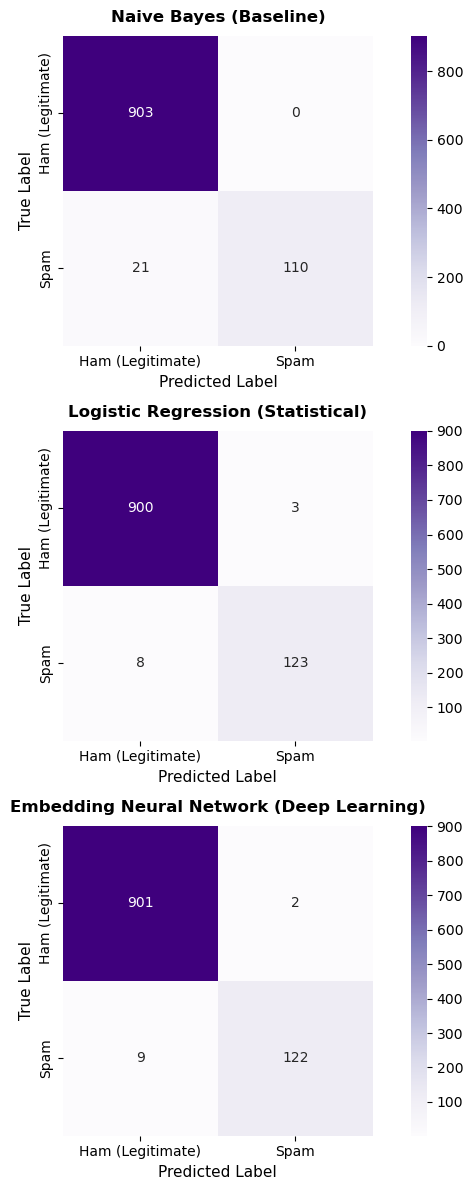

In [29]:
# Confusion matrices data
confusion_matrices = {
    'Naive Bayes (Baseline)': baseline_results['confusion_matrix'],
    'Logistic Regression (Statistical)': log_reg_results['confusion_matrix'],
    'Embedding Neural Network (Deep Learning)': embedding_results['confusion_matrix']
}

# Plot confusion matrices for all three models
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Labels
labels = ['Ham (Legitimate)', 'Spam']

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[idx]
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
               xticklabels=labels, yticklabels=labels,
               ax=ax, square=True)
    
    ax.set_title(model_name, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Predicted Label', fontsize=11)
    ax.set_ylabel('True Label', fontsize=11)

plt.tight_layout()
plt.show()

### Feature Coefficients

In [30]:
# Get feature names and coefficients from Logistic Regression with TF-IDF
feature_names = tf_idf_vectorizer.get_feature_names_out()
coefficients = log_reg_model.coef_[0]

# Get top spam indicators (highest positive coefficients)
top_spam_features = np.argsort(coefficients)[-10:]
print("Top spam indicators:", feature_names[top_spam_features])

# Get top ham indicators (lowest coefficients)
top_ham_features = np.argsort(coefficients)[:10]
print("Top ham indicators:", feature_names[top_ham_features])

Top spam indicators: ['text' 'mobil' 'repli' 'txt' 'free' 'call phone_token' 'url_token'
 'money_token' 'short_cod' 'phone_token']
Top ham indicators: ['dot' 'ok' 'gt' 'lt' 'da' 'got' 'lt gt' 'know' 'home' 'later']


### Analysis of Model Metrics

All three models demonstrated exceptional performance in SMS spam detection, achieving accuracy scores exceeding 97%. The Naive Bayes baseline achieved 97.97% accuracy with perfect precision (1.0000) but lower recall (0.8397), while both Logistic Regression and Embedding Neural Network models reached 98.94% accuracy with more balanced performance profiles.

The most interesting finding was the Naive Bayes baseline model's perfect precision, ensuring zero false positives while sacrificing recall by missing 16.03% of spam messages. This conservative approach makes it ideal for applications where blocking legitimate messages is unacceptable. In contrast, the Logistic Regression model achieved better balance with 0.9762 precision and 0.9389 recall, missing only 6.11% of spam while maintaining excellent precision. The Embedding Neural Network performed similarly with 0.9839 precision and 0.9313 recall, demonstrating that deep learning approaches offer minimal advantage over well-implemented statistical methods for this task.

Cross-validation results revealed slight stability differences. Logistic Regression showed excellent consistency (mean F1: 0.9396 ±0.0133), while Naive Bayes exhibited moderate variability (mean F1: 0.8936 ±0.0453). The Logistic Regression model's low standard deviation indicates high stability across data splits, while the higher variability in Naive Bayes performance suggests greater sensitivity to data composition. The Neural Network's inability to use cross-validation due to its training methodology represents a practical limitation for performance validation.

### Model Strengths and Weaknesses

Naive Bayes proved ideal for SMS spam filtering scenarios where blocking legitimate messages is unacceptable, such as business communications or emergency alerts. Its perfect precision ensures no important messages are lost to false spam detection. However, allowing 16.03% of spam messages to reach users undermines its effectiveness as a spam filter, potentially exposing users to malicious content and unwanted promotional messages.

Logistic Regression emerged as the optimal SMS spam detection solution, successfully blocking 93.89% of spam while maintaining 97.62% precision. Its stability across different message types (spam and ham) and exceptional cross-validation consistency ensure reliable performance as SMS patterns evolve. The model's interpretable feature weights reveal which words and phrases most strongly indicate spam, with high positive coefficients identifying key spam indicators (e.g. "free", "call phone_token", "txt") and high negative coefficients revealing legitimate message patterns (e.g. "ok", "got", "home"). This can enable security teams to understand emerging spam tactics and adapt filtering rules accordingly.

Embedding Neural Network demonstrated competitive spam detection capabilities but offered minimal advantages for SMS filtering applications. While its semantic understanding could theoretically detect sophisticated spam attempts using context manipulation, I believe that the short, pattern-based nature of SMS spam reduces these benefits. The model's computational overhead and training complexity are difficult to justify when simpler approaches achieve nearly identical effectiveness.

### Performance Disparity Analysis

The minimal deep learning advantage could stem from several factors. SMS messages contain short, clear distinguishing patterns that statistical models capture effectively through TF-IDF vectorization with bigrams. The extensive preprocessing successfully extracted discriminative features, reducing the typical advantages of embedding-based approaches. Also, the dataset size (5,169 messages) may be insufficient for neural networks to demonstrate their full potential, as deep learning excels more with larger datasets requiring complex pattern recognition.

## Project Summary and Reflection
[Word Count: 378]

This project provided insights into applying different machine learning approaches for text classification. The implementation revealed that effective preprocessing often matters more than model sophistication, shown by traditional statistical methods competing with modern deep learning approaches. Working with real SMS data highlighted domain-specific characteristics, including informal language, abbreviations, and encoding issues requiring specialized cleaning techniques.

Cross-validation methodology demonstrated the importance of robust evaluation beyond simple train-test splits. Stability differences between models emphasized that consistent performance is more valuable than marginal accuracy improvements in production environments.

### Model Practicality and Real-World Implications

The Naive Bayes baseline demonstrated practical value for scenarios requiring absolute precision, offering interpretable results with minimal computational overhead. Its simplicity enables rapid deployment, making it ideal for filtering critical communication channels where false positives could have serious consequences.

Logistic Regression with TF-IDF emerged as the most viable solution for general SMS spam detection, combining excellent performance with interpretability and computational efficiency. Its feature coefficient analysis provides insights for understanding spam patterns, while consistent cross-validation performance ensures reliable deployment. The model's real-time processing capability and transparency make it perfect for telecommunications providers and other messaging systems requiring regulatory compliance.

Embedding-based Neural Networks demonstrated limited practical advantages due to SMS messages dataset characteristics and size. Their computational overhead and infrastructure requirements make them less suitable for resource-constrained mobile environments, though architectural flexibility positions them well for future challenges.

### Transferability to Other Domains

This study demonstrates that traditional statistical methods remain highly competitive when properly implemented. The comprehensive preprocessing pipeline, including specialized pattern recognition for currencies, phone numbers, and URLs, provides a reusable framework deployable across telecommunications networks and messaging platforms.

The methodology transfers well to other short-text classification domains, including social media content moderation, email filtering, and mobile notification categorization. The preprocessing techniques are particularly valuable for informal text processing across various platforms.

### Future Research

Future improvements should explore ensemble methods combining Naive Bayes precision with Logistic Regression's balanced performance. For neural networks, investigating deeper architectures with multiple LSTM layers and pre-trained embeddings like GloVe or Word2Vec could enhance semantic understanding. Experimenting with different embedding dimensions (100, 200, 300), dropout rates (0.3-0.7), and learning rate schedules may optimize performance on larger SMS datasets. Advanced preprocessing could include character-level tokenization to handle SMS abbreviations and misspellings more effectively.

# References

Abdulhamid, S. M., Latiff, M. S. A., Chiroma, H., Osho, O., Abdul-Salaam, G., Abubakar, A. I., & Herawan, T. (2017). A review on mobile SMS spam filtering techniques. IEEE Access, 5, 15650–15666. https://doi.org/10.1109/access.2017.2666785

Almeida, T. & Hidalgo, J. (2011). SMS Spam Collection [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84

Amazon Web Services. (2023, November 17). SMS character limits - AWS End User Messaging SMS. Retrieved June 25, 2025, from https://docs.aws.amazon.com/sms-voice/latest/userguide/sms-limitations-character.html

Asudani, D. S., Nagwani, N. K., & Singh, P. (2023). Impact of word embedding models on text analytics in deep learning environment: a review. Artificial Intelligence Review, 56(9), 10345–10425. https://doi.org/10.1007/s10462-023-10419-1

Bocereg, A., Tivadar, M., Nutiu, D. C., & Ghinea, A. (2024, January 25). Investigating worldwide SMS scams, and tens of millions of dollars in fraud. Bitdefender Labs. Retrieved June 25, 2025, from https://www.bitdefender.com/en-us/blog/labs/investigating-worldwide-sms-scams-and-tens-of-millions-of-dollars-in-fraud

Cloudmark. (2020, October 27). The true cost of SMS spam: A case study | CloudMark EN. Proofpoint. Retrieved June 25, 2025, from https://www.cloudmark.com/en/resources/white-papers/true-cost-sms-spam-case-study

Ellis, C., & Brandl, R. (2024, October 16). Spam Statistics 2025: New data on junk email, AI scams & Phishing. EmailTooltester.com. Retrieved June 25, 2025, from https://www.emailtooltester.com/en/blog/spam-statistics/

Gadde, S., Lakshmanarao, A., & Satyanarayana, S. (2021). SMS Spam Detection using Machine Learning and Deep Learning Techniques. 2022 8th International Conference on Advanced Computing and Communication Systems (ICACCS), 358–362. https://doi.org/10.1109/icaccs51430.2021.9441783

Gupta, M., Bakliwal, A., Agarwal, S., & Mehndiratta, P. (2018). A Comparative Study of Spam SMS Detection Using Machine Learning Classifiers. In 2018 Eleventh International Conference on Contemporary Computing (IC3) (pp. 1–7). https://doi.org/10.1109/ic3.2018.8530469

Hidalgo, J. M. G., Bringas, G. C., Sánz, E. P., & García, F. C. (2006). Content based SMS spam filtering. In Proceedings of the 2006 ACM Symposium on Document Engineering. Association for Computing Machinery. https://doi.org/10.1145/1166160.1166191

Kaspersky. (2020, April 22). SMS attacks and mobile malware threats. Retrieved June 25, 2025, from https://www.kaspersky.com/resource-center/threats/sms-attacks

Keepnet Labs. (2024, January 26). Smishing Statistics 2025: The latest Trends and numbers in SMS phishing. Keepnet Labs. Retrieved June 25, 2025, from https://keepnetlabs.com/blog/smishing-statistics-the-latest-trends-and-numbers-in-sms-phishing

Roy, P. K., Singh, J. P., & Banerjee, S. (2019). Deep learning to filter SMS Spam. Future Generation Computer Systems, 102, 524–533. https://doi.org/10.1016/j.future.2019.09.001

Siino, M., Tinnirello, I., & La Cascia, M. (2023). Is text preprocessing still worth the time? A comparative survey on the influence of popular preprocessing methods on Transformers and traditional classifiers. Information Systems, 121, 102342. https://doi.org/10.1016/j.is.2023.102342

Statista. (2024, May). Smartphone mobile network subscriptions worldwide 2016-2028. Retrieved June 25, 2025, from https://www.statista.com/statistics/330695/number-of-smartphone-users-worldwide/

Tagg , C. (2009). A Corpus Linguistics Study Of SMS Text Messaging (thesis). 